# Machine Learning - Assignment 1

> Hoang Dang - s3927234

---

## Questions

- Hỏi thầy về cách trình bày, ảnh thì để ở đâu, code thì để ở đâu, nếu để ảnh vs code ở giữa thì tính trang như nào, trình bày như hiện tại thì đã ok chưa?
- Phần report thầy thích jupyter hay latex?
- Phần report thì thầy có muốn xem code ko?

---

- How to use correlation with categorical data? (The `status` column and many other columns are categorical, which is not good for correlation)
- Outliers?
  - Use box diagram to identify
  - What to do with them?
- Nếu histogram có hai cột mà một cột cao hơn thì có phải là skewed ko?
- Tại sao khi bỏ ExtraMedTest và ExtraAlcoholTest thì accuracy giảm nhiều vậy
- Why Training Data and Testing Data are so alike to each other?
- Besides from DecisionTreeClassifier, Logistic Regression, RandomForestClassification
  - RandomForestClassification seems to be the best
  - What other models can I use?
  - Can I use other libraries?
- Skwed data thì sẽ giải quyết như nào?
- What model measurements should I use for this problem? (Accuracy, F1, ...)
  - Bệnh thì nên thừa còn hơn thiếu?
  - Số ca bệnh ít hơn hẳn số ca ko bị, nên thấy bảo nên dùng Recall và Precision thay vì accuracy
  - Có nên xài AUC làm measurement ko?
- Accuracy khoảng bao nhiêu thì là ok, làm thế nào để nằm trong top lớp, 5% là dựa vào tiêu chí nào (Accuracy, F1, ...)
- Có nên remove duplicates ko, nên remove sau hay trc khi train_test_split
- Có một section tên là Feature Engineering, nma mình ko định thêm feature nào, thì sao h?
- Nếu ta làm các bước data preprocessing trong lúc training như normalization, giảm skewed, .. thì khi test cũng phải làm tương tự đúng ko, và ko có cách nào để check chúng ta chẳng may convert data sai hay gì?
- Sau khi chọn được best model, ta có nên train nó bằng 100% training data ko?
- Làm thế nào để yên tâm là ta đang ko overfitting, cứ test trên validation data mà thấy ok thì liệu có thể yên tâm?

- Feedback for EDA, Python script
- Hỏi thầy mấy cái graph plot như này đã ok chưa



- Vì cái data mình dùng để test trông giống data để train quá, ko có sự biến động, nên trong lúc train dùng càng nhiều attributes càng tốt
- Nên chia data như nào
  - Hold-out r cross validation
  - Hay là Cross validation hết, r holdout sau
- Nếu mà tuning một para thì có thể plot graph so sánh được, nhưng mà tuning nhiều paras thì how
- Lúc mà thầy thêm cột Extra, thầy có đổi cột Status cho phù hợp với 2 cột extra ko

## Note

- ROC and AUC: https://www.youtube.com/watch?v=4jRBRDbJemM, điều chỉnh threshold
  - what if there are some parts that red is better, and some parts that blue is better? 
- Use regularization technique to reduce overfitting
- Cross validation
- Cái của mình chắc sẽ là Recall focus, nma nếu ko rõ Precision hay Recall, ta sẽ dùng F1 (Better than accuracy)
- Dataset của mình imbalance (có nhiều ng ko bị hơn là người bị), thầy bảo hỏi chatGPT xem giải phát là gì
- Tut3 có kĩ thuật giảm skewed
- Có thể trình bày theo cách của Tutorial mẫu
- Xử lí skewed data???
- Thầy bảo ExtraMedTest và ExtraAlcoholTest là continous
- Thầy bảo plot hình so sánh các tuning (Tham khảo tut3)
- Có nên print .head() để preview ko
- Shuffle data lên
- nên chia dataset thành 3 phần: 1 training, 1 valiadtion, 1 testing. Nếu chỉ chia thành 2 phần 1 training và 1 testing, thì tức là ta sẽ tuning dựa theo testing, và ta sẽ bị bias vì dùng testing data đấy để làm cái tuning và testing. Thế nên giải pháp là chia làm 3, validation sẽ chỉ dùng để tuning, testing sẽ chỉ dùng để testing model cuối cùng
- Ko giới hạn model
- Giải thích mấy cái outliers như hiện tại liệu đã ok -.-? 
- W5 có các phương pháp để tránh overfitting
- "Should add as many model as you can within the limited number of pages"
- Có thể tuning para individually để tìm một cái range, sau đấy mình tuning multi paras ở quanh đấy
- Tut6, sẽ có pre-pruning và post-pruning techniques, có thể dùng để train models!

- Resampling data?


## Tasks

> Tập trung làm script trc nhé, report dể vt sau
- Làm từng model một, mỗi model sẽ tuning để tìm ra cái tốt nhất, plot các graph thể hiện tuning
- Các cái xử lí data có thể viết dưới dạng function, để có thể dùng nhiều lần
- Xem lại mấy cái kaggle tham khảo
- Viết phần Instruction, table contents
- Có thể thêm phần summary ở cuối mỗi section
- [Split data r dùng train để auto tune](https://www.kaggle.com/code/shreayan98c/hyperparameter-tuning-tutorial)


Here's a suggested workflow:

Hyperparameter Tuning: Use GridSearchCV to tune the hyperparameters for each classifier. You've already done this step.

Select Best Model: After hyperparameter tuning, select the best model for each classifier based on cross-validation scores. This is typically done by choosing the model with the highest mean cross-validation score.

Evaluate Best Model: Once you've selected the best model for each classifier, evaluate their performance on a held-out test set or using cross-validation metrics such as accuracy, precision, recall, F1-score, etc.

ROC Analysis: If you're dealing with binary classification tasks, you can then use ROC analysis to assess the performance of each best model. This involves calculating the ROC curve and computing metrics like AUC (Area Under the ROC Curve) to compare the models' ability to distinguish between positive and negative classes.

Decision Threshold Selection: Additionally, you can analyze the ROC curve to select an optimal decision threshold depending on your specific requirements (e.g., maximizing sensitivity, specificity, or balancing both).

Final Model Selection: Based on the ROC analysis and other evaluation metrics, you can make a final decision on which classifier performs best for your task.




## Table of Contents

- [1. Overview](#overview)
  - [Introduction]()
  - [Instruction]()
- [2. Problem Formulation](#problem_formulation)
- [3. Exploratory Data Analysis](#eda)
  - [Load the Dataset]()
  - [Descriptive Statistics]()
  - [Variables Distribution]()
  - [Correlation Analysis]()
- [4. Evaluation Framework](#evaluation_framework)
  - [Evaluation Metrics]()
  - [Validation Strategy]()
- [5. Data Preprocessing](#data_preprocessing)
  - [Data Normalization]()
  - [Handling Duplicates]()
  - [Features Selection]()
- [6. Models Implementation](#models_implementation)
  - [Logistic Regression]()
  - [Decision Tree Classifier]()
  - [Random Forest Classifier]()
  - [Gradient Boosting Machines]()
- [7. Analysis and Evaluation](#analysis_and_evaluation)
- [8. Diabetes Prediction](#diabetes_prediction)

## 1. Overview <a class="anchor" id="overview"></a>


### Introduction

This study aims to employ machine learning methodologies for the prediction of diabetes onset in individuals utilizing different health metrics and demographic information. This notebook will guide you through a series of steps including:

- **Problem Formulation**: Defining the task at hand and providing necessary context for understanding the problem
- **Exploratory Data Analysis**: Examining the dataset to understand the distribution of attributes, identify patterns, and detect anomalies
- **Evaluation Framework**: Defining evaluation metrics, selecting validation strategy, addressing potential issues such as overfitting, and establishing criteria for model selection
- **Data Preprocessing**: Scaling numerical attributes and performing features selection
- **Models Implementation**: Training and fine-tuning different machine learning models
- **Analysis and Evaluation**: Evaluating the performance and choosing the best machine learning model
- **Diabetes Prediction**: Using the chosen model to predict diabetes


### Instruction

As this notebook has been written using `Jupyter Notebook`, you will encounter Python code snippets along the way. These code snippets are designed to be executed sequentially to facilitate your understanding of the problem. In addition, there are also extra explanations that aim to provide clarity on what is happening at each step of the analysis.

<div class="alert alert-block alert-danger">

In order to use this notebook, there will be some python libraries that you have to download as listed in the `requirements.txt` file. In addition, `data_test.csv` and `data_train.csv` need to be placed in the `data` folder.
</div>



## 2. Problem Formulation <a class="anchor" id="problem_formulation"></a>

The first step in developing a model is to formulate the problem in a way that we can apply machine learning. In here, the task is to predict the **presence or absence of diabetes** using various health metrics and demographic information of individuals.

Based on the problem type, the training dataset, and the `code_book.txt`, some information we can get are:
- This is a `Supervised Learning` and specifically, `Binary Classification` problem since the training data contains the `Status` column representing the occurance of diabetes, which is also what we are trying to predict (0 for absence and 1 for presence)
- In the training dataset, there are in total 25 columns, in which:
  - The `Id` column will not be used since it does not contribute to the occurance of diabetes
  - The `Status` column will be used as the target variable for the training process
  - The remaining 23 columns are the attributes and will be used for the data analyzing and training processes
- Data attribute types:
  - There are 8 `ordinal attributes` namely GenHlth (1 - 5), MentHlth (1 - 30), PhysHlth (1 - 30), Age (1 - 13), Education (1 - 6), Income (1 - 8), ExtraMedTest (-199, 199), ExtraAlcoholTest (-199, 199)
  - BMI is the only `continuous attribute`
  - The remaining 14 features are `binary attributes`, which can only be either 0 or 1

## 3. Exploratory Data Anaylysis <a class="anchor" id="eda"></a>

In this section, we will work on Exploratory Data Analysis (EDA), a crucial step in the data analysis that allows us to gain insights into the structure, distribution, and relationships of different attributes within our dataset

### Load the Dataset

We begin by importing necessary libraries

In [9]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical computing
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization

We then load the training data in `data_train.csv` into `health_data` variable. In here, we tell Pandas that the `Id` column will be used as the `index_col` (For indexing purpose only). We can have a look at the loaded data using `.head` method

In [10]:
health_data = pd.read_csv("./data/data_train.csv", delimiter=",", index_col="Id")

pd.set_option('display.max_columns', None)  # tell pandas to display all columns
health_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


### Descriptive Statistics

After loading the training dataset into a `Pandas DataFrame`, we can extract some information using `.shape` and `.describe` methods

In [11]:
print(health_data.shape)  # get the size of the DataFrame

health_data.describe(include='all')  # get some insight of each column of the dataset

(202944, 24)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,0.055912,0.951543,0.083693,2.514024,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,0.229752,0.214730,0.276928,1.070370,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


Based on the output, we can see that:
- Our dataset has in total 202,944 rows (records) and 24 columns (23 of which are attributes and the `Status` column as the expected output)
- There are **no missing values** in the dataset since all columns have exactly 202,944 rows
- The percentage of people suffering from High Blood Pressure and High Cholesterol are nearly the same at about 42%
- BMI has values ranging from 12 to 98. The average BMI is 28.38, which is relatively high [ref](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/)
- Most people had Cholesterol Check (96%) and Health Care Coverage (95%)
- There are minor of people suffered from Stroke (4%), Heavy Alcohol Consump (6%), No Doctor because of Cost (8%), Heart Disease and Attack (9%), and Walking Difficulty (17%)
- There are more than a half of people having a healthy lifestyle with Physical Activity at 76%, Fruits Consume at 64%, and Veggies Consume at 81%
- Surprisingly, the statistics of ExtraMedTest and ExtraAlcoholTest are nearly the same
- **Only 17.6% of people suffered from Diabetes (The Target variable)**, we can then conclude that we are having an `imbalance dataset`


Besides that, we can also use the `.info` method to see a list of all columns with their corresonding data types as indicated below. We can see that all fields are of type `int64` and has 202,944 non-null records

In [12]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-null  

We can see that all attributes are of type `int64`, which does not need datatype conversion and can be used for later training process

We can further perform some analysis as follows

In [13]:
# checking unique values in different attributes
unique_values = {}
for col in health_data.columns:
    unique_values[col] = health_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count'])

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
unique value count,2,2,2,83,2,2,2,2,2,2,2,2,2,5,31,31,2,2,13,6,8,399,399,2


In [14]:
# checking for number of duplicated rows
print("Number of duplicated rows:", health_data.duplicated().sum())

Number of duplicated rows: 208


### Variables Distribution

In addition to features provided by Pandas, we can also use `Matplotlib` and `Seaborn` to visualize different attributes in the dataset. We will begin by plotting the `histogram` charts to see the data distribution of each attribute

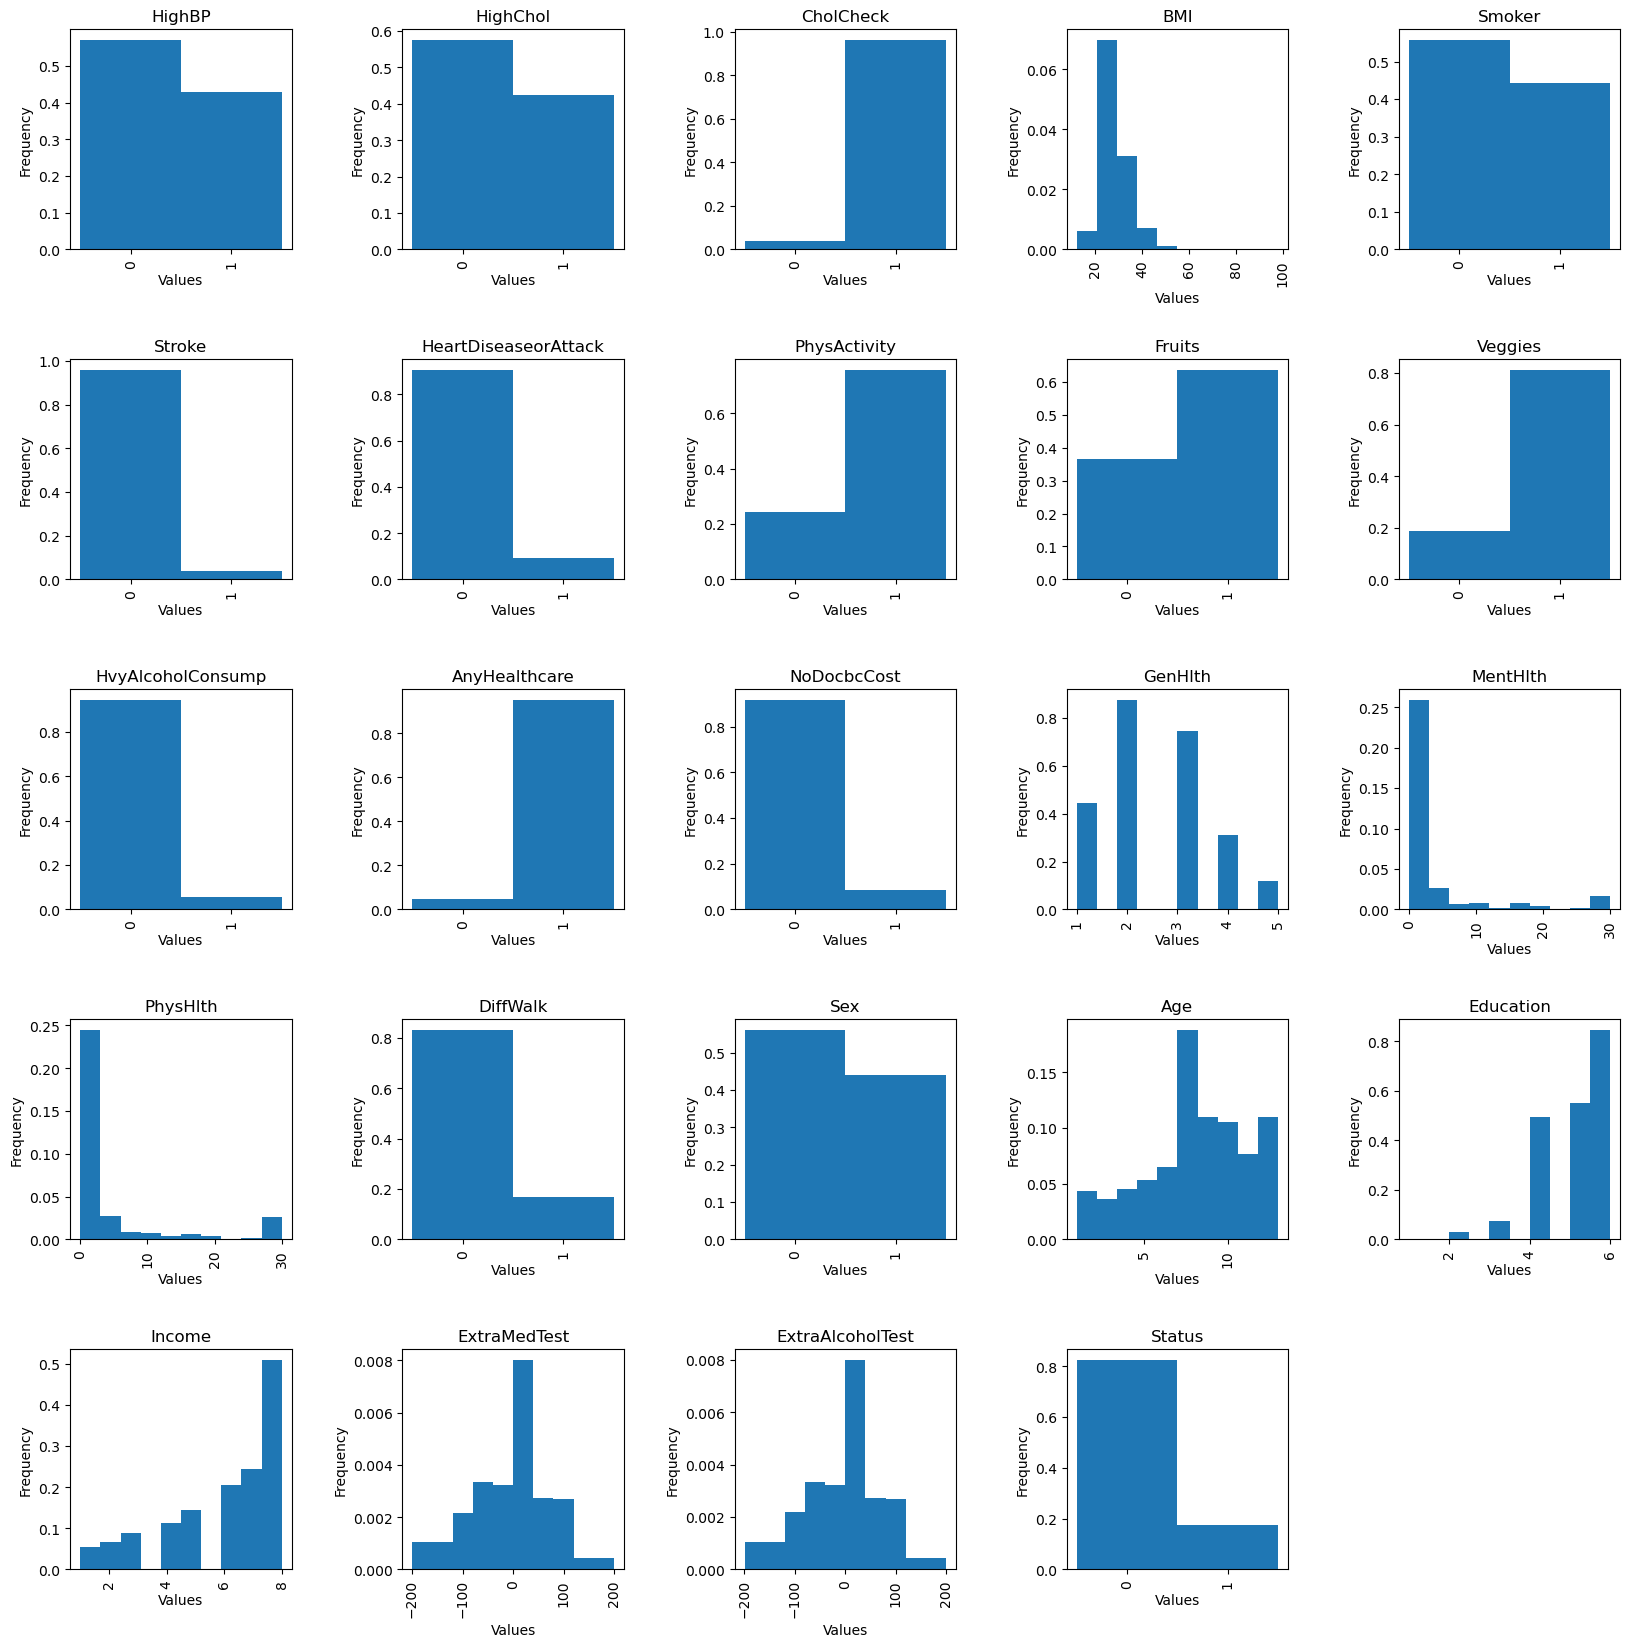

In [15]:
# A function to plot the histogram of attributes in data
def plot_histogram(data):
    # create a figure to hold different subplots
    plt.figure(figsize=(20,20))

    # iterate through each column in data and plot a corresponding histogram
    for i, col in enumerate(data.columns):
        plt.subplot(5,5,i+1)
        
        # check if unique values in the column are only 0 and 1
        if sorted(data[col].unique()) == [0, 1]:
            plt.hist(data[col], bins=[-0.5, 0.5, 1.5], density=True)
            plt.xticks([0, 1])
        else:
            plt.hist(data[col], density=True)
        
        plt.title(col)
        plt.xticks(rotation='vertical')

        # add axis labels
        plt.xlabel('Values')
        plt.ylabel('Frequency')

    # add space between each subplot
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    plt.show()


plot_histogram(health_data)


In here, we can see that:
- ExtraMedTest and ExtraAlcoholTest are relatively similar to each other and have a **symmetrical distribution**
- BMI is **right skewed** with the majority falls between 20 and 30
- HighBP, HighChol, Smoker, and Sex are **balance**, while CholCheck, Stroke, AnyHealthCare, NoDocbcCost, MentHlth, PhysHlth, DiffWalk, Education, Income, and Status are **imbalance**
- In MentHlth and PhysHlth, the value of 30 gets surprisingly higher compared to previous values close to it. It is possible that someone, in the past 30 days, did not have a good mental/physical health experience, so we can conclude that this is not a data error


Besides from Histogram, we can also use `Box plot` to visualize our data

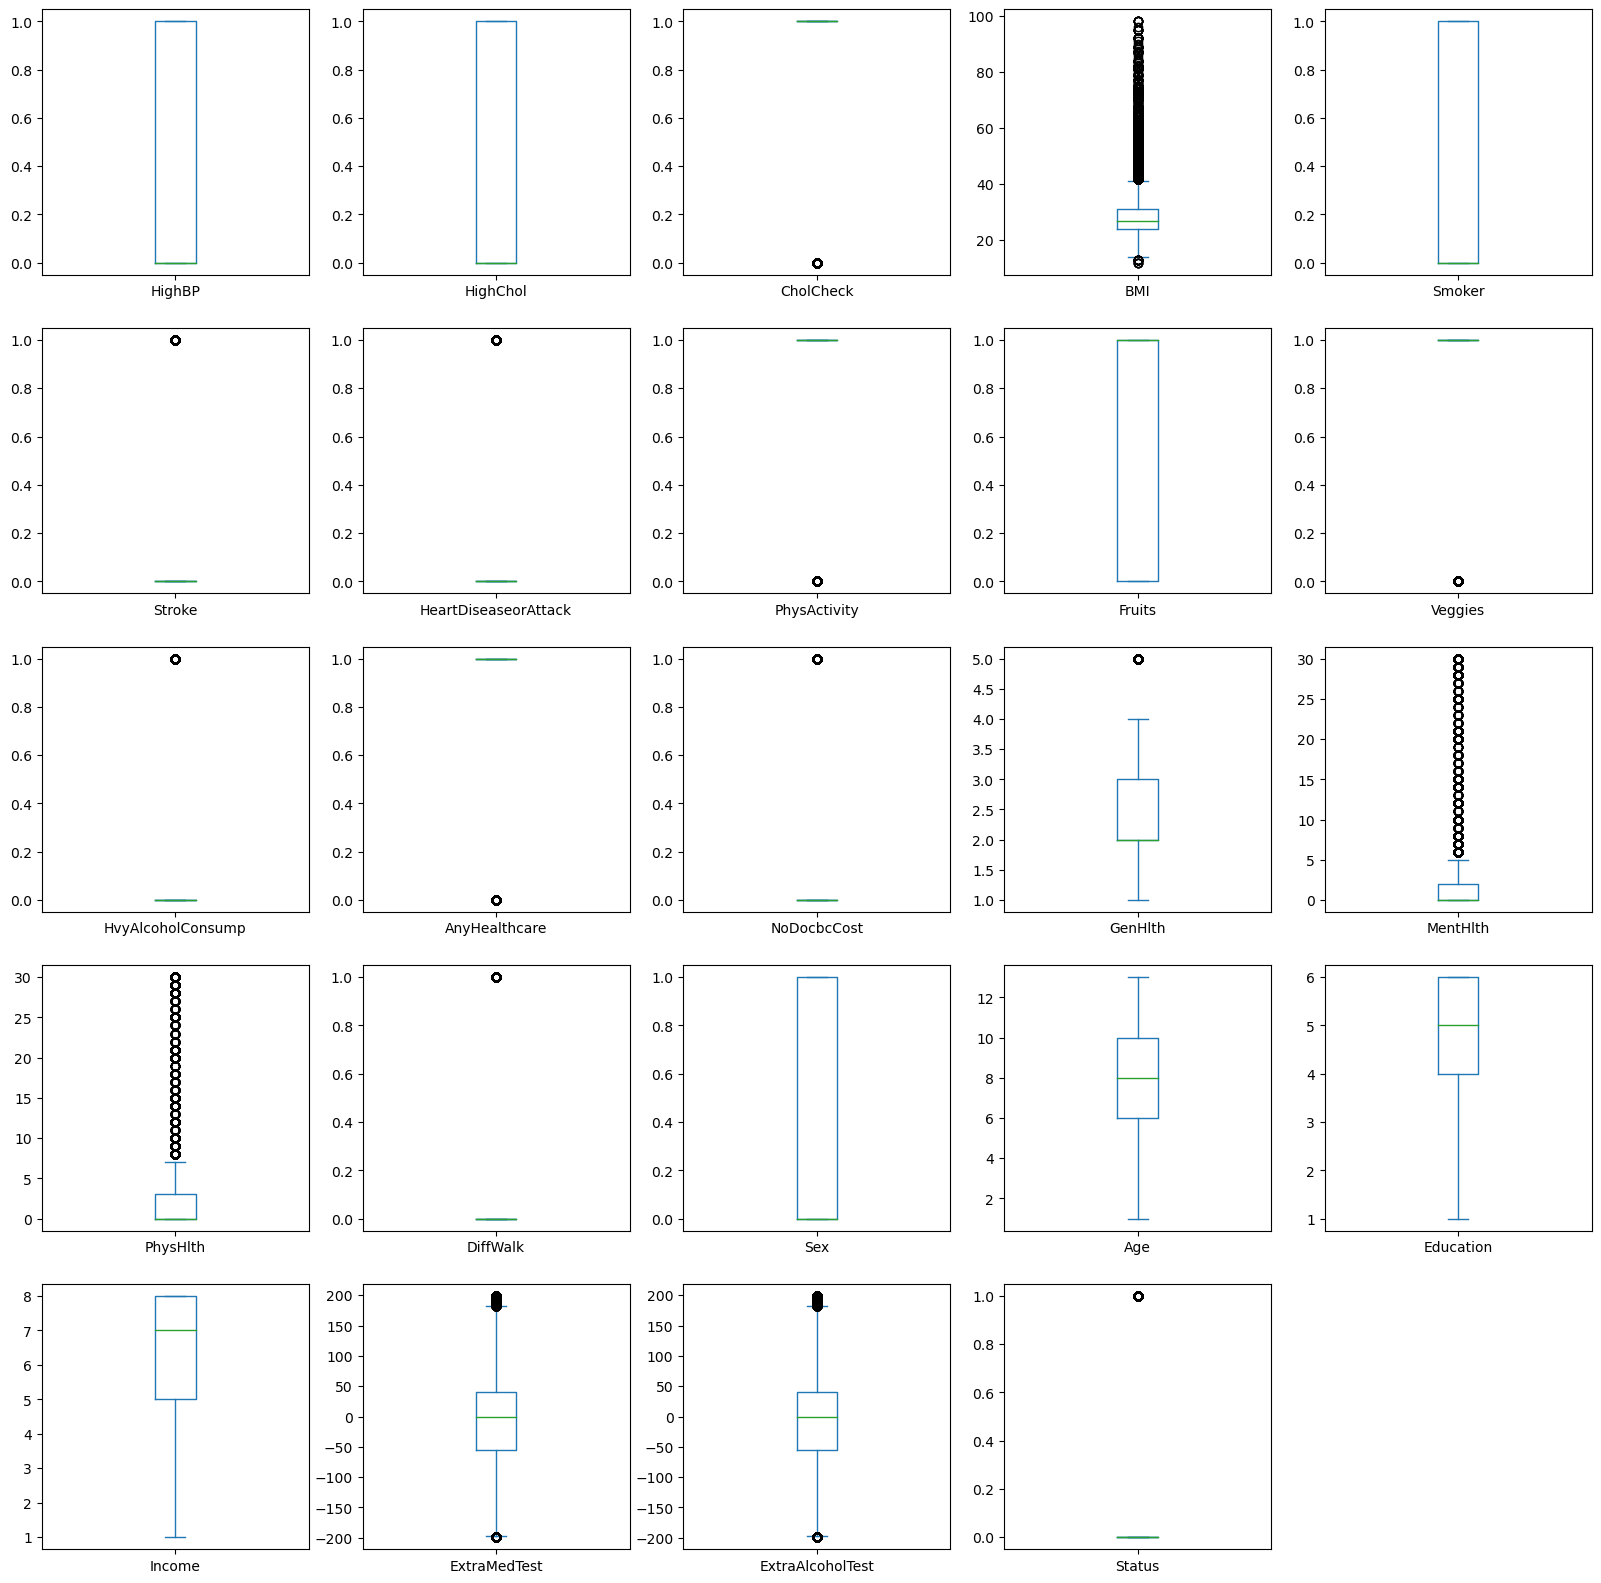

In [16]:
health_data.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

We can see that:
- There are a lot of outliers in BMI (from 40 to 100), MentHlth (from 5 to 30), and PhysHlth (from 7 to 30). However, it is possible that someone has BMI up to 100 [ref]() and someone has a 30 days unwell. We can conclude that these outliers are not data collection error and will keep all of them
- Some outliers occuring in **binary attributes** like CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk indicate that there are some imbalance between the two binary classes
- On the other hand, the box plots of HighBP, HighChol, Smoker, Fruits, and Sex show that there is a balance distribution between the values

### Correlation Analysis

In addition to visualizing data distribution, we can also display the correlation between different columns of the dataset

<Axes: title={'center': 'Correlation graph'}>

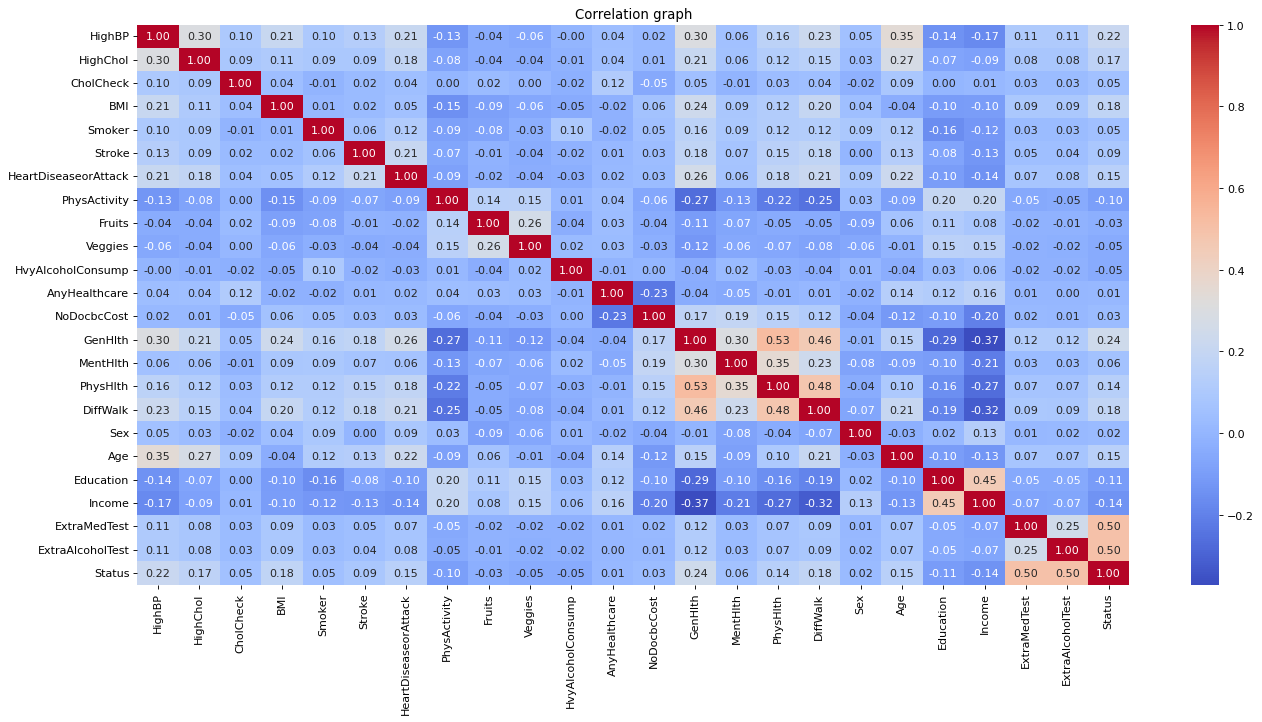

In [11]:
# Compute correlation matrix
corr = health_data.corr()

# Create a figure object
fig = plt.figure(figsize=(20, 20), dpi=80)
ax1 = fig.add_subplot(211)
ax1.set_title("Correlation graph")

# Create a heatmap of the correlation matrix with annotations and specified color map
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')

We can also visualize the correlation between all attributes vs the target variable `Status` as follow

<Axes: title={'center': 'Correlation with Status'}>

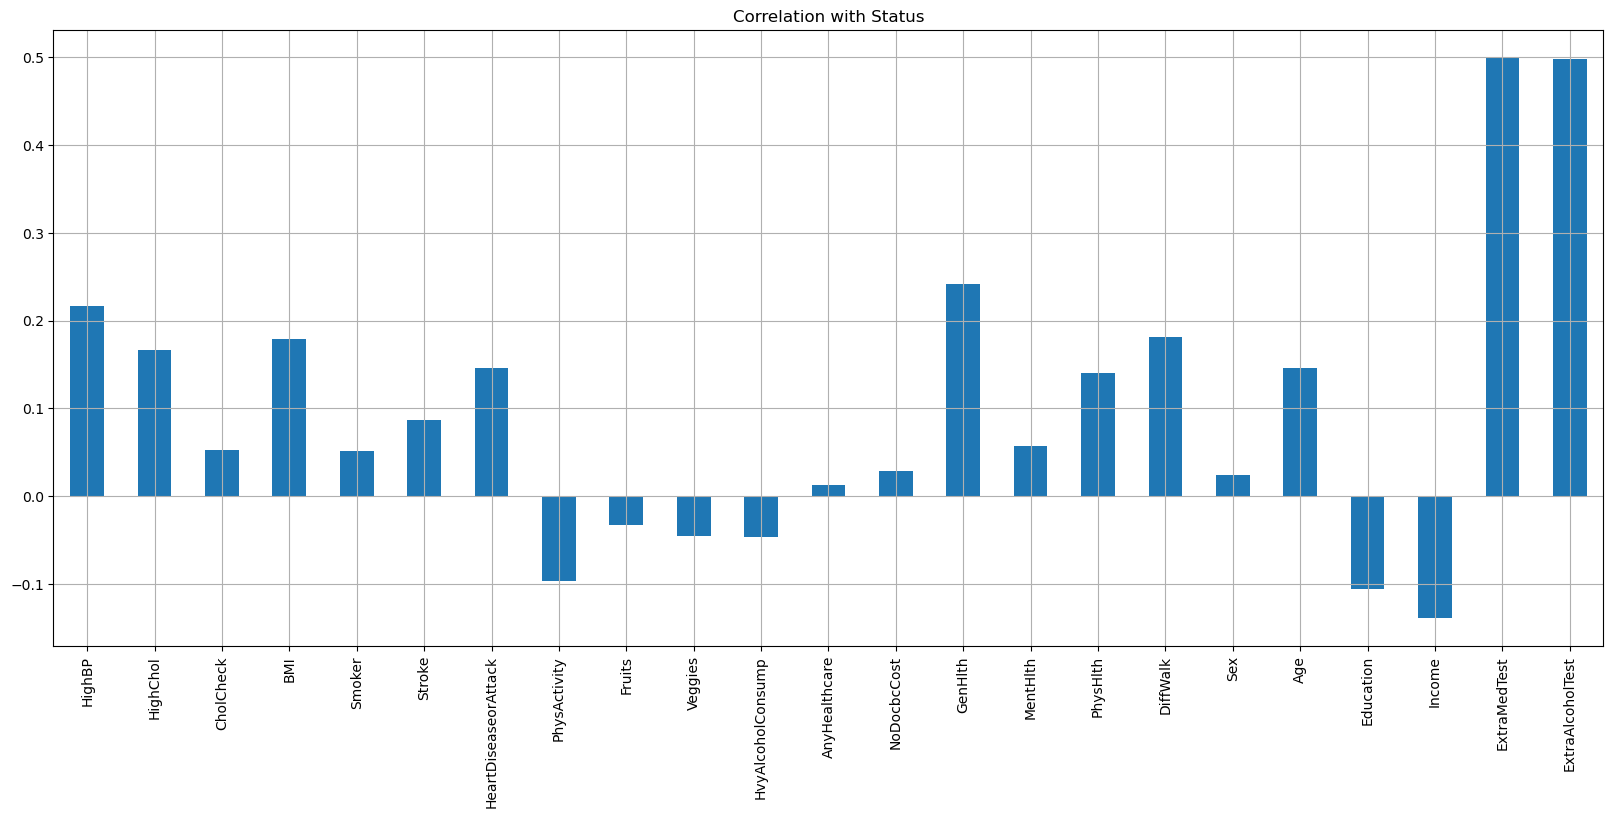

In [12]:
health_data.drop('Status', axis=1).corrwith(health_data.Status).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Status")

From the two plotted graphs, we can see that:
- Some high correlated attributes are:
  - GenHlth and PhysHlth: 0.53
  - GenHlth and DiffWalk: 0.46
  - DiffWalk and PhysHlth: 0.48
  - GenHlth and Income: -0.37
- CholCheck, Smoker, Stroke, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, MentHlth, Sex are low correlated with `Status` with less than 0.1
- On the other hand, ExtraMedTest and ExtraAlcoholTest are highly correlated with `Status` at 0.5

<div class="alert alert-block alert-info">

**Some important take-aways:**
- There are **no missing values** in the dataset
- We are having an **imbalance dataset** with diabetes occupying only 17.6%
- **ExtraMedTest** and **ExtraAlcoholTest** are highly correlated with **Status** at 0.5
</div>

## 4. Evaluation Framework <a class="anchor" id="evaluation_framework"></a>

### Evaluation Metrics

For a `Binary Classification` problem, there are different evaluation metrics that we can choose like accuracy, precision, recall, etc. However, since we are **detecting a disease** (diabetes), the positive class will be more importance due to the potential consequences of **missing positive instances** (false negatives). In addition, given the **imbalance in the dataset**, where the positive class occupies only 17.6% of the data, traditional evaluation metrics like accuracy may not adequately capture the performance of the model, as a naive classifier could achieve high accuracy by simply predicting the majority class. Therefore, we will prioritize metrics that are robust to class imbalance and emphasize the correct identification of positive instances. With that being said, we will firstly focus on `F1-score` and `Precision-Recall AUC` [ref](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc), while also consider other metrics like `Recall`, `Precision`, and `Accuracy`.

- F1-score: Balances precision and recall, crucial for capturing positive instances accurately, robust to class imbalance
- Precision-Recall AUC: Quantifies precision-recall trade-off, robust to class imbalance, essential for disease detection
- Recall, precision, and accuracy: Offer complementary insights, aiding comprehensive model assessment


### Validation Strategy

<img src="validationStrategy.png">

To ensure thorough model evaluation, we will firstly split our dataset into Training set (80%) and Validation set (20%). After that, the Training set will be used with GridSearchCV to find the best hyperparameters for different machine learning models. In GridSearchCV, the `cv` technique will be **K-fold Cross validation** to ensure robustness and reduce overfitting, while the `scoring` option will be `F1-score` as dicussed in **Evaluation Metrics** section. After finding all best estimators (hyperparameters) of different models, we will eventually evaluate their performance on Validation set (unseen data) as well as plotting `PR AUC` with different thresholds to rank and choose the best machine learning model.


## 5. Data Preprocessing <a class="anchor" id="data_preprocessing"></a>

After successfully load the dataset, perform EDA, and setting up evaluation framework, the next step is Data Preprocessing where we adjust the dataset and choosing important features to best prepare for later training process

### Data Normalization

As we can see in EDA section, our dataset contains attributes with different value ranges (0 to 1, -199 to 199, 0 to 13, etc.). By scaling the data to a common range, we ensure that all attributes contribute equally to the model's learning process, thereby preventing any particular attribute from dominating due to its larger range of values. We will use `Min-max scaler` from sklearn to scale the values to fall between 0 and 1

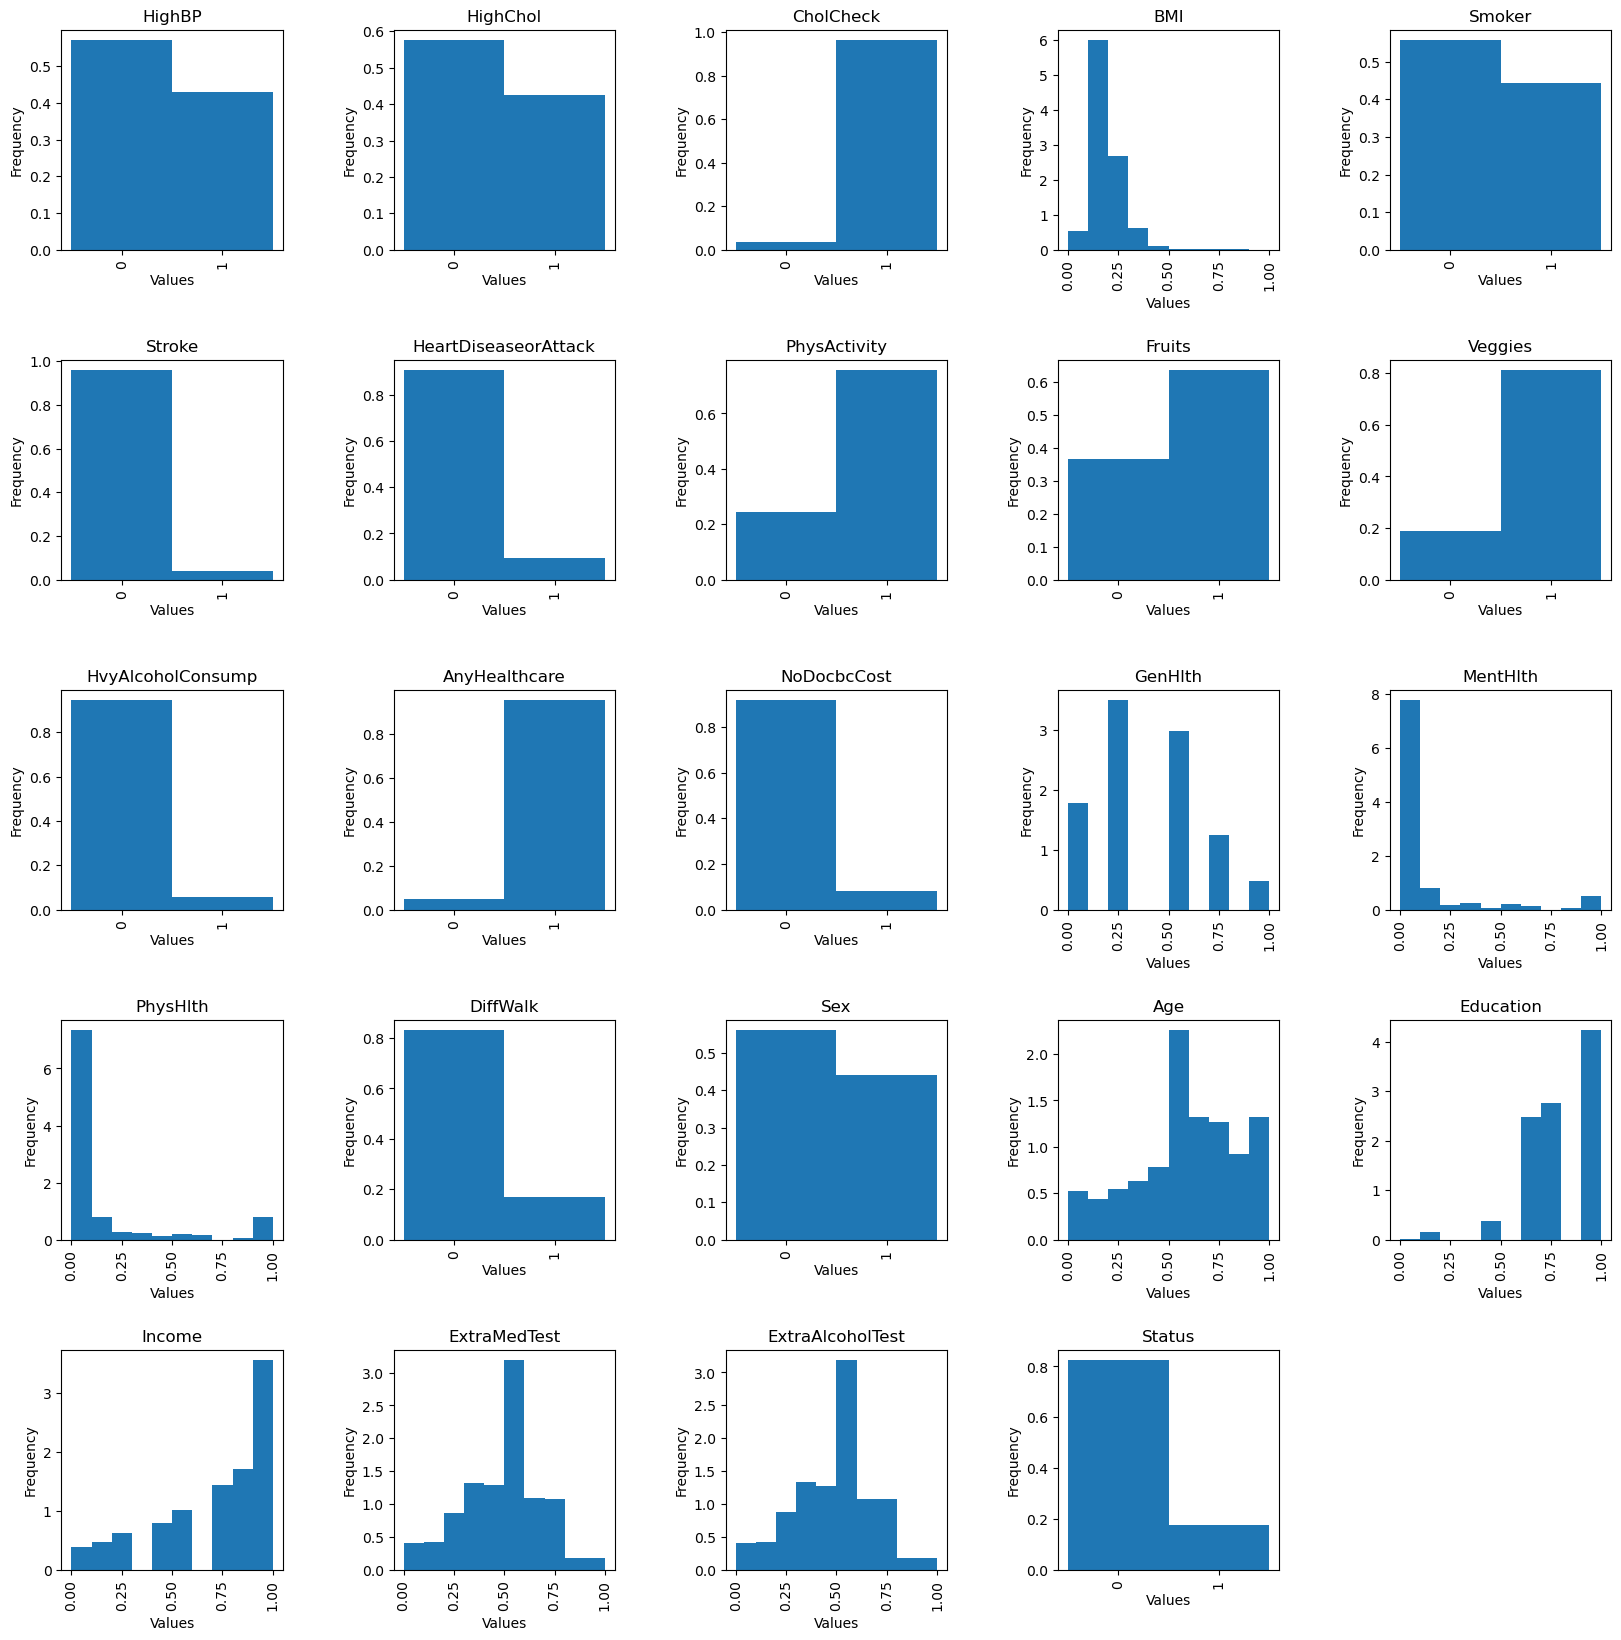

In [13]:
from sklearn.preprocessing import MinMaxScaler

# list of columns that need scaling
numerical_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income", "ExtraMedTest", "ExtraAlcoholTest"]

# scaling using Min Max approach
scaler = MinMaxScaler()

# scaling the columns
health_data[numerical_cols] = scaler.fit_transform(health_data[numerical_cols])

# plot the histogram to preview the updated attributes
plot_histogram(health_data)

### Handling duplicates

As we can see in previous section, our dataset has around 200 duplicated records, which is only about 0.1% of the dataset.

<div class="alert alert-block alert-danger">

The question of whether or not removing duplicates will result in better models' performance is still unknown; therefore, **we will assess both scenarios**
</div>

If you want to remove duplicates, run the code cell below (skip it if you want to keep the duplicated records)

In [14]:
print("Number of duplicates:", health_data.duplicated().sum())

# remove duplicates in the dataset
health_data = health_data.drop_duplicates()

print("Number of duplicates:", health_data.duplicated().sum())

Number of duplicates: 208
Number of duplicates: 0


### Features Selection

After successfully adjusting the data, the next step is to choose important features to use for later models training. Based on our analysis in previous sections, some of the possible features groups that we can consider are listed below. 

<div class="alert alert-block alert-danger">

To use one group, uncomment it and comment out the others. Later, we will evaluate which features selection results in the best model performance
</div>

In [15]:
## using all features
# selected_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# selected_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
#        'HeartDiseaseorAttack',
#        'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']


## using only high correlated features
# selected_features = ['ExtraMedTest', 'ExtraAlcoholTest']


## not selecting high correlated features (ExtraMedTest and ExtraAlcoholTest) to see how BAD the model performs
# selected_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


## only selecting >= 0.1 correlated features
selected_features = ['HighBP', 'HighChol', 'BMI',
       'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
       'ExtraMedTest', 'ExtraAlcoholTest']


X = health_data[selected_features].copy()

In [16]:
y = health_data.Status

In [17]:
print(X.shape)
print(y.shape)

(202736, 13)
(202736,)


### Features Encoding

In [18]:
# from sklearn.preprocessing import OneHotEncoder

# # categorical columns
# categorical_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# # Assuming you've already performed feature selection and stored the remaining columns in selected_features
# selected_categorical_cols = [col for col in categorical_cols if col in selected_features]

# # Use pandas to convert these columns to categorical type
# X[selected_categorical_cols] = X[selected_categorical_cols].astype('category')
# X.info()

In [19]:
# # Initialize OneHotEncoder without specifying the sparse_output parameter
# onehot_encoder = OneHotEncoder()

# # Fit and transform the categorical columns
# onehot_encoded = onehot_encoder.fit_transform(X[selected_categorical_cols])

# # Get the feature names for the one-hot encoded columns
# feature_names = onehot_encoder.get_feature_names_out(input_features=selected_categorical_cols)

# # Convert the one-hot encoded array into a DataFrame
# onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=feature_names)

# # Reset the index of X and onehot_df before concatenation
# X.reset_index(drop=True, inplace=True)
# onehot_df.reset_index(drop=True, inplace=True)

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# X = pd.concat([X, onehot_df], axis=1)

# # Drop the original categorical columns
# X.drop(selected_categorical_cols, axis=1, inplace=True)

# # Preview the result
# X.head()


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(162188, 13)
(40548, 13)
(162188,)
(40548,)


## 6. Models Implementation <a class="anchor" id="models_implementation"></a>

After successfully setting up the data, the next step is to choose, implement, and evaluate different machine learning models

For a binary classification task, various models can be considered, including:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier (sklearn)
- Gradient Boosting Machine (XGBoost)

We firstly look at each model, specifically, using GridSearchCV to find the best hyperparameters. After that, we will compare models of different types by evaluating their performance on unseen data (validation set). This comparative analysis will help us understand the strengths and weaknesses of each model and determine which one is most suitable for our specific classification task

In [21]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

# using 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to search
    params = {
        'C': trial.suggest_categorical('C', [0.1, 1, 10, 100]),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'max_iter': trial.suggest_categorical('max_iter', [200, 300])
    }

    # Instantiate the logistic regression model with current hyperparameters
    logis_model = LogisticRegression(**params)

    # Create polynomial features up to degree 2
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_train)

    return np.mean(cross_val_score(logis_model, X_poly, y_train, cv=kf, scoring='f1'))

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Retrieve the best hyperparameters
best_params = study.best_params
best_logis_model = LogisticRegression(**best_params)

# Create polynomial features up to degree 2 for the entire dataset
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

logis_scores = cross_val_score(best_logis_model, X_poly, y_train, cv=kf, scoring='f1')

# Print the cross-validation scores and mean score
print("Best params:", best_params)
print("Cross-validation F1 scores:", logis_scores)
print("Mean CV F1 Score:", np.mean(logis_scores))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# define the logistic regression model
logis_model = LogisticRegression()


parameters = {
    'C': [0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'max_iter': [200, 300]
}

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# perform grid search with cross-validation
grid_obj = GridSearchCV(logis_model, parameters, cv=kf, scoring='f1')
grid_obj.fit(X_poly, y_train)

# get the best estimator
best_logis_model = grid_obj.best_estimator_
print("Best params:",grid_obj.best_params_)

# Create polynomial features up to degree 2 for the entire dataset
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# calculate the cross-validation scores
logis_scores = cross_val_score(best_logis_model, X_poly, y_train, cv=kf, scoring='f1')
print("Cross-validation F1 scores:", logis_scores)
print("Mean CV F1 Score:", np.mean(logis_scores))

# calculate the validation score
# logis_valid_score = cross_val_score(best_logis_model, X_valid, y_valid, cv=kf, scoring='f1')
# print("Cross-validation F1 scores valid:", logis_valid_score)
# print("Mean CV F1 Score valid:", np.mean(logis_valid_score))


Best params: {'C': 10, 'class_weight': None, 'max_iter': 200}


NameError: name 'cross_val_score' is not defined

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


logis_model = LogisticRegression(C=10, class_weight=None, max_iter=200)
logis_model.fit(X_poly, y_train)
logis_score = cross_val_score(logis_model, X, y, cv=kf, scoring='f1')

# Print the cross-validation scores
print("Cross-validation F1 scores:", logis_score)
print("Mean CV F1 Score:", logis_score.mean())

Cross-validation F1 scores: [0.7887281  0.78442748 0.78496742 0.77672024 0.78427237 0.77010089
 0.77782924 0.77309682 0.78047273 0.77761104]
Mean CV F1 Score: 0.7798226339861769


### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


# Define the decision tree model
tree_model = DecisionTreeClassifier()

# Define the hyperparameters grid
parameters = {
    'max_depth': [None, 5, 8, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 50, 100],
}

# Perform grid search with cross-validation
grid_obj = GridSearchCV(tree_model, parameters, cv=kf, scoring='f1')
grid_obj.fit(X_train, y_train)

# Get the best estimator
best_tree_model = grid_obj.best_estimator_
print("Best params:", grid_obj.best_params_)

# Calculate the cross-validation scores
dt_scores = cross_val_score(best_tree_model, X_train, y_train, cv=kf, scoring='f1')
print("Cross-validation F1 scores:", dt_scores)
print("Mean CV F1 Score:", np.mean(dt_scores))

dt_scores = cross_val_score(best_tree_model, X_valid, y_valid, cv=kf, scoring='f1')
print("Cross-validation F1 scores:", dt_scores)
print("Mean CV F1 Score:", np.mean(dt_scores))


# Best params: {'class_weight': None, 'max_depth': None, 'max_leaf_nodes': 100, 'min_samples_leaf': 4, 'min_samples_split': 2}
# Cross-validation F1 scores: [0.87693487 0.87549108 0.86941792 0.87714418 0.8716094  0.87139824
#  0.87689249 0.87002188 0.87661538 0.8727762 ]
# Mean CV F1 Score: 0.8738301658262879


Best params: {'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validation F1 scores: [0.86679174 0.86667953 0.87354538 0.86859345 0.8807619  0.88143177
 0.871218   0.86295585 0.87654087 0.87617614]
Mean CV F1 Score: 0.8724694638782224
Cross-validation F1 scores: [0.86452623 0.89422356 0.88729361 0.85735964 0.86415963 0.87987758
 0.86743295 0.8735271  0.87471526 0.85846868]
Mean CV F1 Score: 0.8721584240820908


In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


tree_model = DecisionTreeClassifier(random_state=1, max_leaf_nodes=50)
tree_score = cross_val_score(tree_model, X, y, cv=kf, scoring='f1')

# Print the cross-validation scores
print("Cross-validation F1 scores:", tree_score)
print("Mean CV F1 Score:", tree_score.mean())

Cross-validation F1 scores: [0.87511507 0.87549347 0.86981975 0.87230721 0.87232428 0.87041865
 0.8747903  0.86848272 0.87865475 0.87278151]
Mean CV F1 Score: 0.8730187696197012


### Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the Random Forest model
forest_model = RandomForestClassifier()

# Define the hyperparameters grid
parameters = {
    # 'n_estimators': [300, 400],
    'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt'],
    # 'class_weight': [None, 'balanced']
}

# Perform grid search with cross-validation
grid_obj = GridSearchCV(forest_model, parameters, cv=kf, scoring='f1')
grid_obj.fit(X, y)

# Extract the hyperparameters and their corresponding scores
params = grid_obj.cv_results_['params']
scores = grid_obj.cv_results_['mean_test_score']

# Get the best estimator
best_forest_model = grid_obj.best_estimator_
print("Best params:", grid_obj.best_params_)

# Calculate the cross-validation scores
rf_scores = cross_val_score(best_forest_model, X, y, cv=kf, scoring='f1')

# Print the cross-validation scores and mean score
print("Cross-validation F1 scores:", rf_scores)
print("Mean CV F1 Score:", np.mean(rf_scores))


Best params: {'max_depth': 20}
Cross-validation F1 scores: [0.87371805 0.87216174 0.87018349 0.87291147 0.87441931]
Mean CV F1 Score: 0.8726788113907455


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint

# Define the Random Forest model
forest_model = RandomForestClassifier()

# Define the hyperparameters distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(range(5, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt'],
    'class_weight': [None, 'balanced']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(forest_model, param_distributions=param_dist, n_iter=100, cv=kf, scoring='f1', random_state=42)
random_search.fit(X, y)

# Get the best estimator
best_forest_model = random_search.best_estimator_
print("Best params:", random_search.best_params_)

# Calculate the cross-validation scores
rf_scores = cross_val_score(best_forest_model, X, y, cv=kf, scoring='f1')

# Print the cross-validation scores and mean score
print("Cross-validation F1 scores:", rf_scores)
print("Mean CV F1 Score:", np.mean(rf_scores))

/Users/hoangdang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hoangdang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hoangdang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/hoangdang/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constrain

Best params: {'class_weight': None, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 104}
Cross-validation F1 scores: [0.87522049 0.87152669 0.87059906 0.87172874 0.87593469]
Mean CV F1 Score: 0.8730019356519684


In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


forest_model = RandomForestClassifier(random_state=1)
forest_score = cross_val_score(forest_model, X, y, cv=kf, scoring='f1')

# Print the cross-validation scores
print("Cross-validation F1 scores:", forest_score)
print("Mean CV F1 Score:", forest_score.mean())

Cross-validation F1 scores: [0.87538462 0.87110568 0.86808247 0.87294376 0.87274382 0.86538165
 0.8719531  0.87017024 0.87471034 0.8705599 ]
Mean CV F1 Score: 0.8713035574430309


### Gradient Boosting Machines

In [ ]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Initialize XGBClassifier
clf = XGBClassifier()

# Initialize cross-validation strategy
cv = StratifiedKFold(5)

min_features_to_select = 1  # Minimum number of features to consider

# Initialize RFECV
rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select,
    n_jobs=2
)

# Fit RFECV
rfecv.fit(X, y)

# Print optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Get indices of selected features
selected_features_indices = rfecv.support_

print("Selected features indices:")
print(selected_features_indices)


In [ ]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Define the hyperparameters grid
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [1, 0.1, 0.01],
    'n_estimators': [50, 100, 125, 150],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='f1', cv=kf)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_valid)

# Calculate f1 score
print("Best param:", best_params)
print("F1 Score:", f1_score(y_valid, y_pred, average='micro'))
print("F1 Score:", f1_score(y_valid, y_pred, average='macro'))
print("F1 Score:", f1_score(y_valid, y_pred))

# 0.87801


Best param: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 125}
F1 Score: 0.9600966755450331
F1 Score: 0.9265275059795608
F1 Score: 0.8768645357686453


In [270]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize XGBoost classifier with the best parameters
xgb_clf = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200)

# Train the classifier on your data
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_valid)

# Evaluate the classifier
f1 = f1_score(y_valid, y_pred)

print("Model Evaluation Metrics:")
print(f"F1 Score: {f1}")


Model Evaluation Metrics:
F1 Score: 0.877914951989026


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Assuming y_pred is your predicted labels
# Assuming y_test is your true labels

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:")
print(accuracy)


# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy score:
0.9592581631646444
Confusion Matrix:
[[33227   257]
 [ 1395  5669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33484
           1       0.96      0.80      0.87      7064

    accuracy                           0.96     40548
   macro avg       0.96      0.90      0.92     40548
weighted avg       0.96      0.96      0.96     40548



### Support Vector Machine (SVM)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Break off validation set from training data
X_train, val_X, y_train, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print(X_train.shape)
print(val_X.shape)

#specify the model. For model reproducibility, set a numeric value for random_state
model = RandomForestClassifier(random_state=1)
model_2 = DecisionTreeClassifier(random_state=1, max_leaf_nodes=50)  # Ít bị ảnh hưởng bởi outliers
model_3 = LogisticRegression(max_iter=19500)

# Fit the model
model.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
  
predictions = model.predict(val_X)
predictions_2 = model_2.predict(val_X)
predictions_3 = model_3.predict(val_X)

print("Accuracy score of model 1: ", f1_score(val_y, predictions))
print("Accuracy score of model 2: ", f1_score(val_y, predictions_2))
print("Accuracy score of model 3: ", accuracy_score(val_y, predictions_3))

(162355, 23)
(40589, 23)
Accuracy score of model 1:  0.872315683386309
Accuracy score of model 2:  0.8743479594967781
Accuracy score of model 3:  0.9310650668900441


<Axes: >

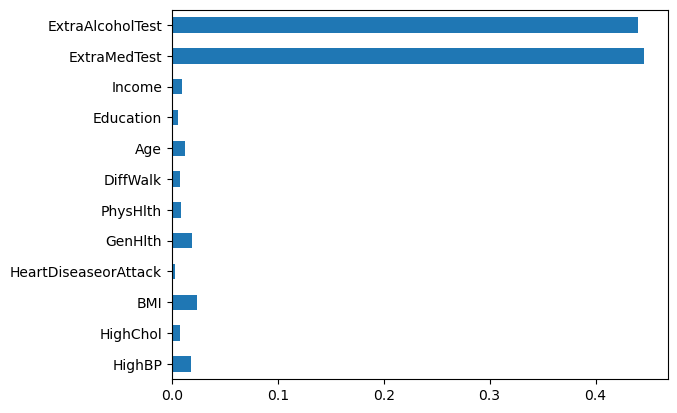

In [122]:
pd.Series(best_forest_model.feature_importances_, index=X.columns).plot(kind='barh')

[[32984   408]
 [ 1296  5901]]


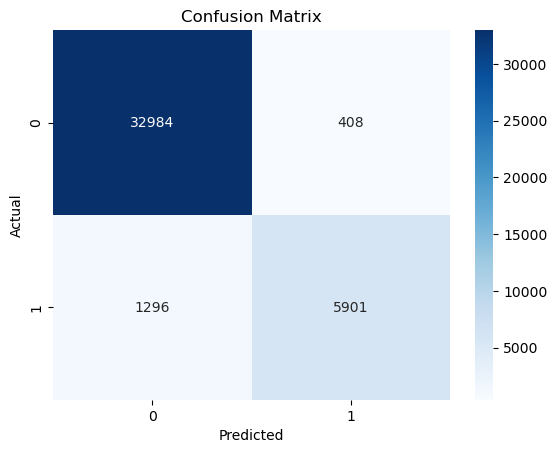

In [121]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(val_y, predictions_2)

print(conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [126]:
def get_accuracy_score(max_leaf_nodes, X_train, val_X, y_train, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X_train, y_train)
    preds_val = model.predict(val_X)
    ac = f1_score(val_y, preds_val)
    return(ac)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 60, 70, 80, 90, 100, 500, 1000, 1200, 2000, 5000]:
    my_ac = get_accuracy_score(max_leaf_nodes, X_train, val_X, y_train, val_y)
    print("Max leaf nodes: %d  \t\t Accuracy:  %f" %(max_leaf_nodes, my_ac))

Max leaf nodes: 5  		 Accuracy:  0.857120
Max leaf nodes: 50  		 Accuracy:  0.874396
Max leaf nodes: 60  		 Accuracy:  0.874118
Max leaf nodes: 70  		 Accuracy:  0.873986
Max leaf nodes: 80  		 Accuracy:  0.874057
Max leaf nodes: 90  		 Accuracy:  0.874905
Max leaf nodes: 100  		 Accuracy:  0.874896
Max leaf nodes: 500  		 Accuracy:  0.872180
Max leaf nodes: 1000  		 Accuracy:  0.863561
Max leaf nodes: 1200  		 Accuracy:  0.863295
Max leaf nodes: 2000  		 Accuracy:  0.857525
Max leaf nodes: 5000  		 Accuracy:  0.836444


> CÓ THỂ LÀM MODEL CHẠY CHUẨN HƠN CHO TESTING BẰNG CÁCH TRAIN 100% TRAIN DATA LUÔN!!!, KO CẦN CHỪA LẠI CHO VALIDATION!

You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size. That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

## 7. Analysis and Evaluation <a class="anchor" id="analysis_and_evaluation"></a>

## 8. Diabetes Prediction <a class="anchor" id="diabetes_prediction"></a>

In [2]:
import pandas as pd

health_data_test = pd.read_csv("./data/data_test.csv", delimiter=",", index_col="Id")

health_data_test = health_data_test.drop("Status", axis=1)

health_data_test.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,...,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000
mean,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,0.811022,...,2.500867,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202
std,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,0.391495,...,1.060819,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000
max,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000


In [3]:

health_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50736 entries, 202944 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                50736 non-null  int64
 1   HighChol              50736 non-null  int64
 2   CholCheck             50736 non-null  int64
 3   BMI                   50736 non-null  int64
 4   Smoker                50736 non-null  int64
 5   Stroke                50736 non-null  int64
 6   HeartDiseaseorAttack  50736 non-null  int64
 7   PhysActivity          50736 non-null  int64
 8   Fruits                50736 non-null  int64
 9   Veggies               50736 non-null  int64
 10  HvyAlcoholConsump     50736 non-null  int64
 11  AnyHealthcare         50736 non-null  int64
 12  NoDocbcCost           50736 non-null  int64
 13  GenHlth               50736 non-null  int64
 14  MentHlth              50736 non-null  int64
 15  PhysHlth              50736 non-null  int64
 16  Dif

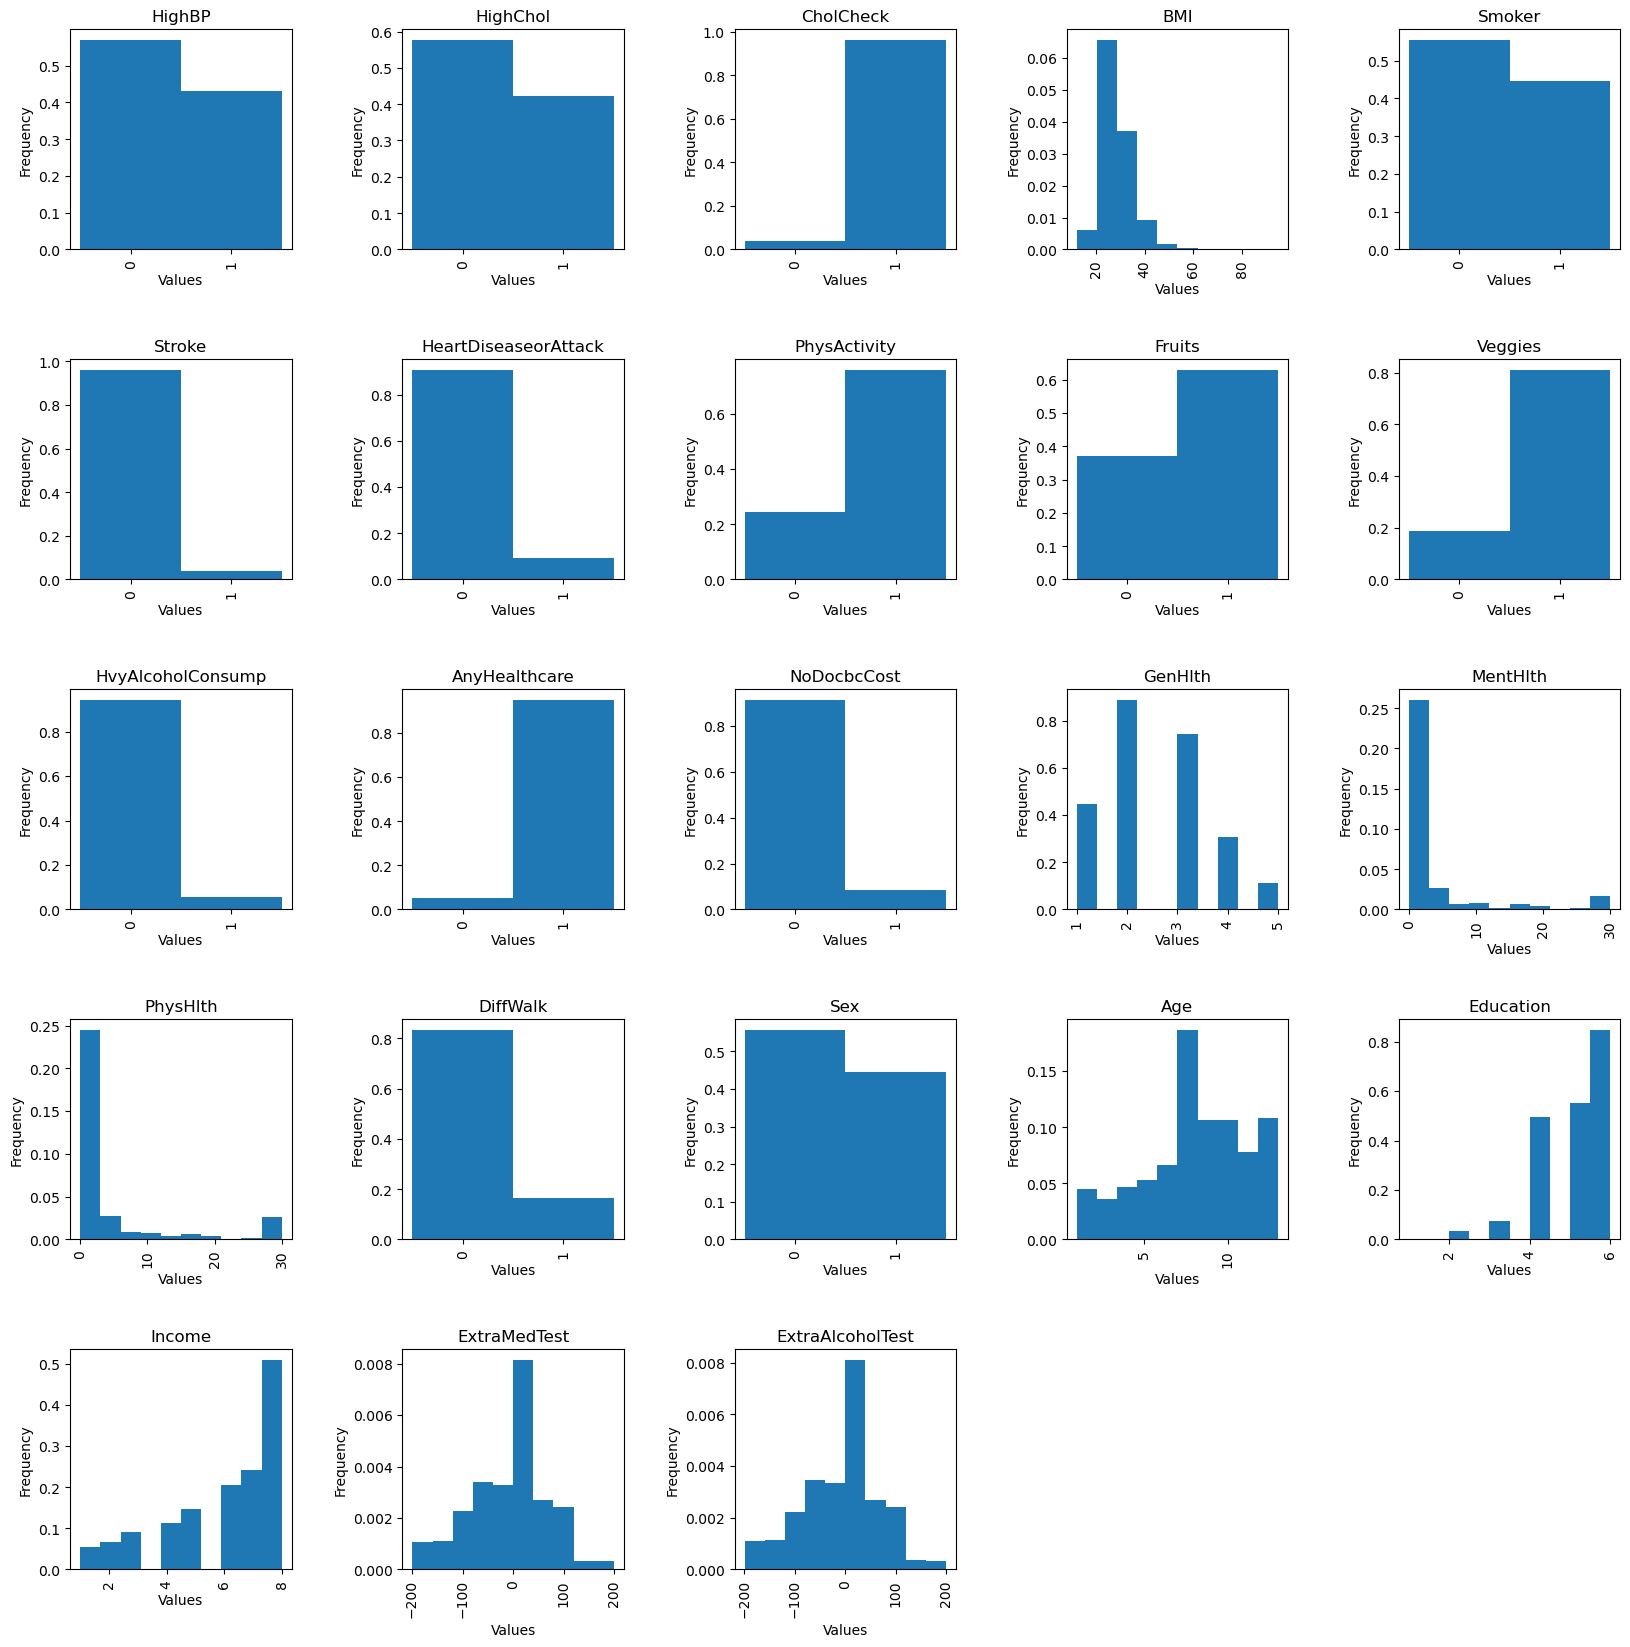

In [7]:
import matplotlib.pyplot as plt

# Create a figure to hold different subplots
plt.figure(figsize=(20,20))

# Iterate through each column in health_data_test and plot a corresponding histogram
for i, col in enumerate(health_data_test.columns):
    plt.subplot(5,5,i+1)
    
    # Check if unique values in the column are only 0 and 1
    if sorted(health_data_test[col].unique()) == [0, 1]:
        plt.hist(health_data_test[col], bins=[-0.5, 0.5, 1.5], density=True)
        plt.xticks([0, 1])
    else:
        plt.hist(health_data_test[col], density=True)
    
    plt.title(col)
    plt.xticks(rotation='vertical')

    # Adding axis labels
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()




# X_test = health_data_test[feature_names].copy()

# test_prediction = final_model.predict(X_test)

# # Save predictions in format used for competition scoring
# output = pd.DataFrame({'Id': X_test.index,
#                        'Status': test_prediction})
# output.to_csv('submission.csv', index=False)

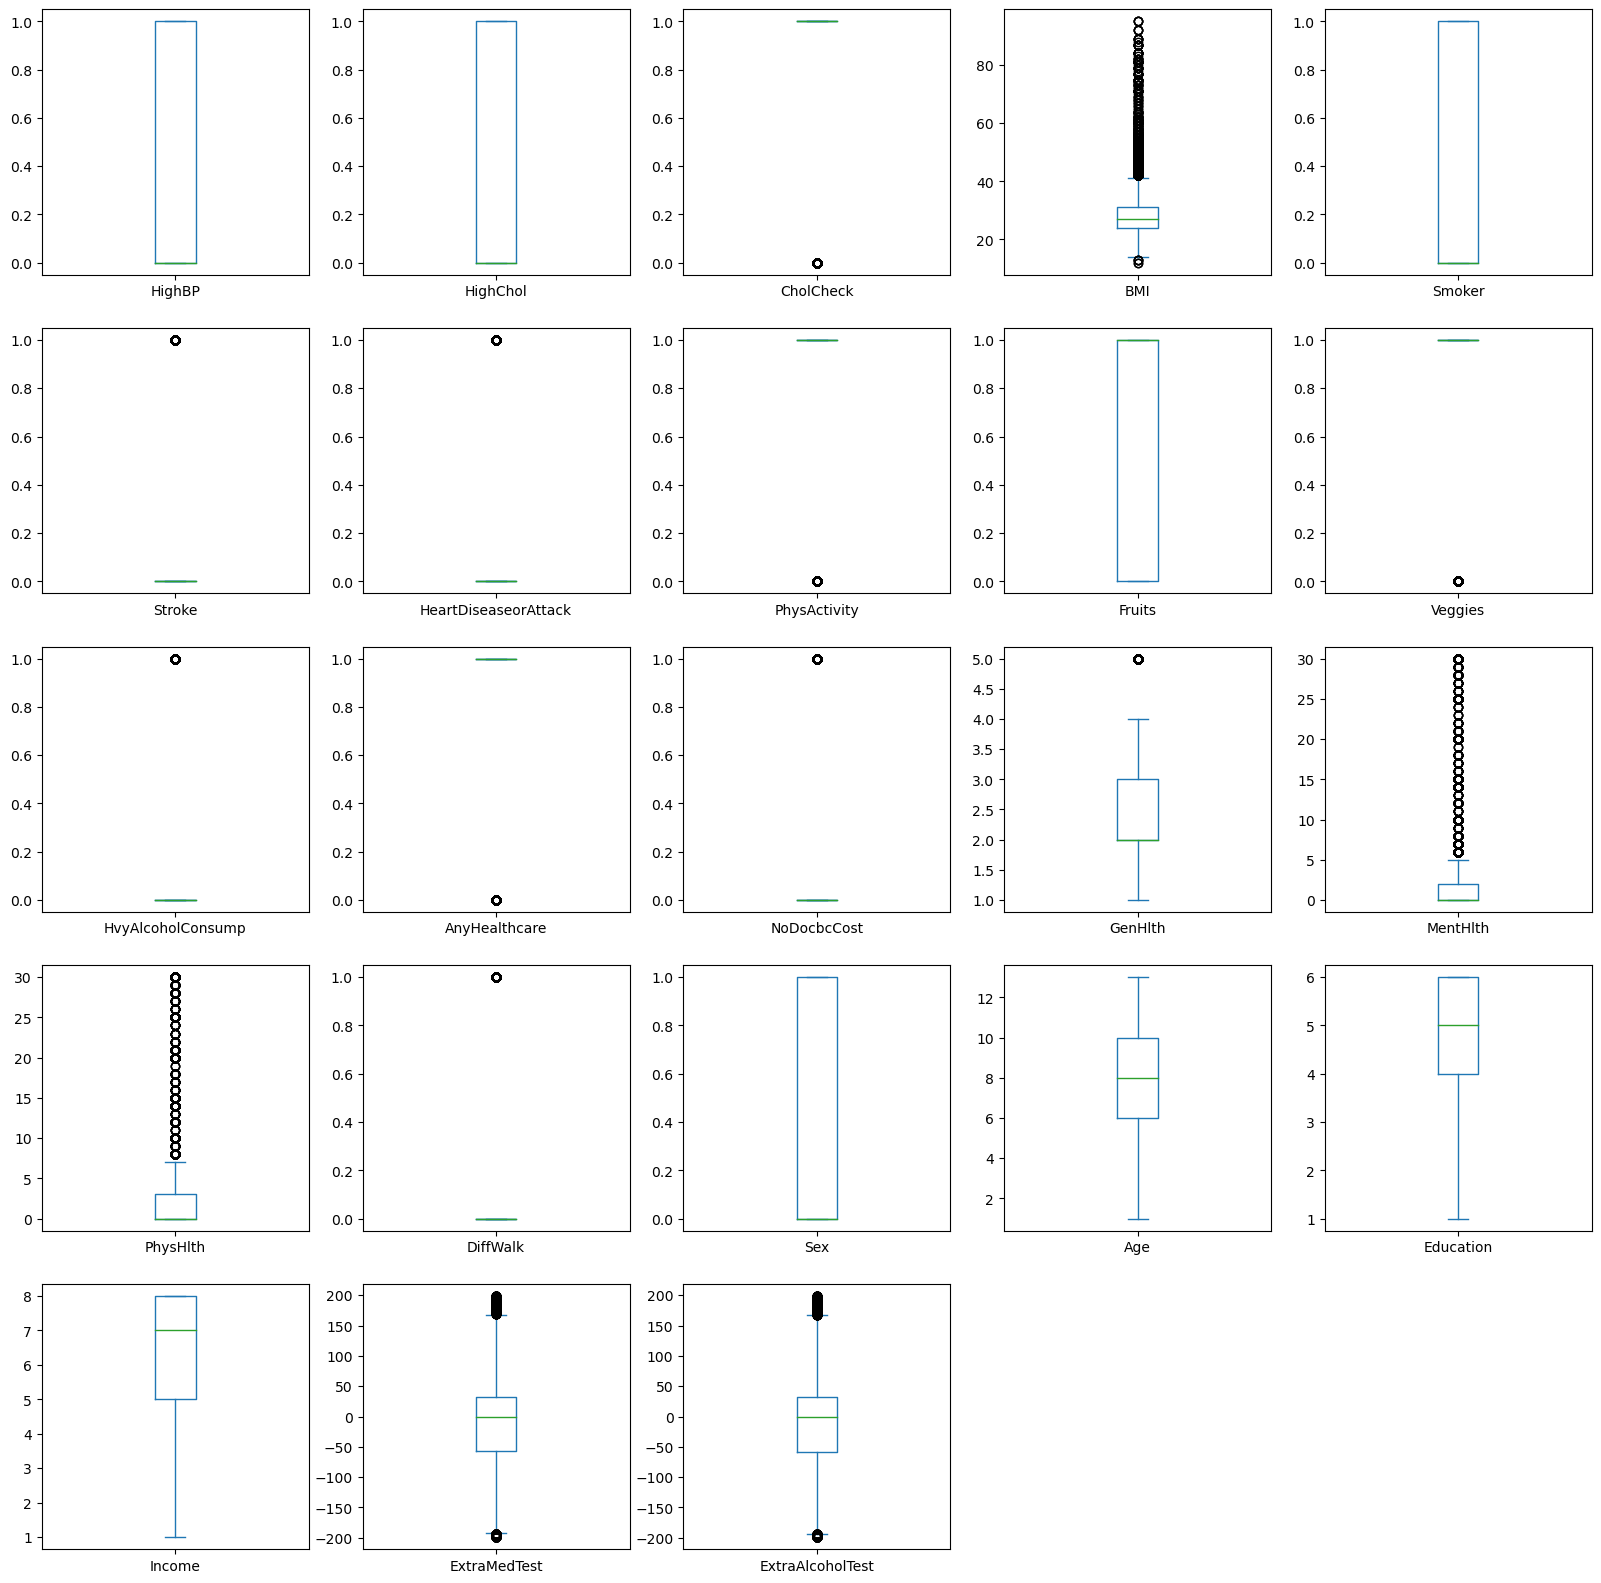

In [8]:
health_data_test.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

In [45]:
print("Number of duplicates:", health_data_test.duplicated().sum())

Number of duplicates: 14


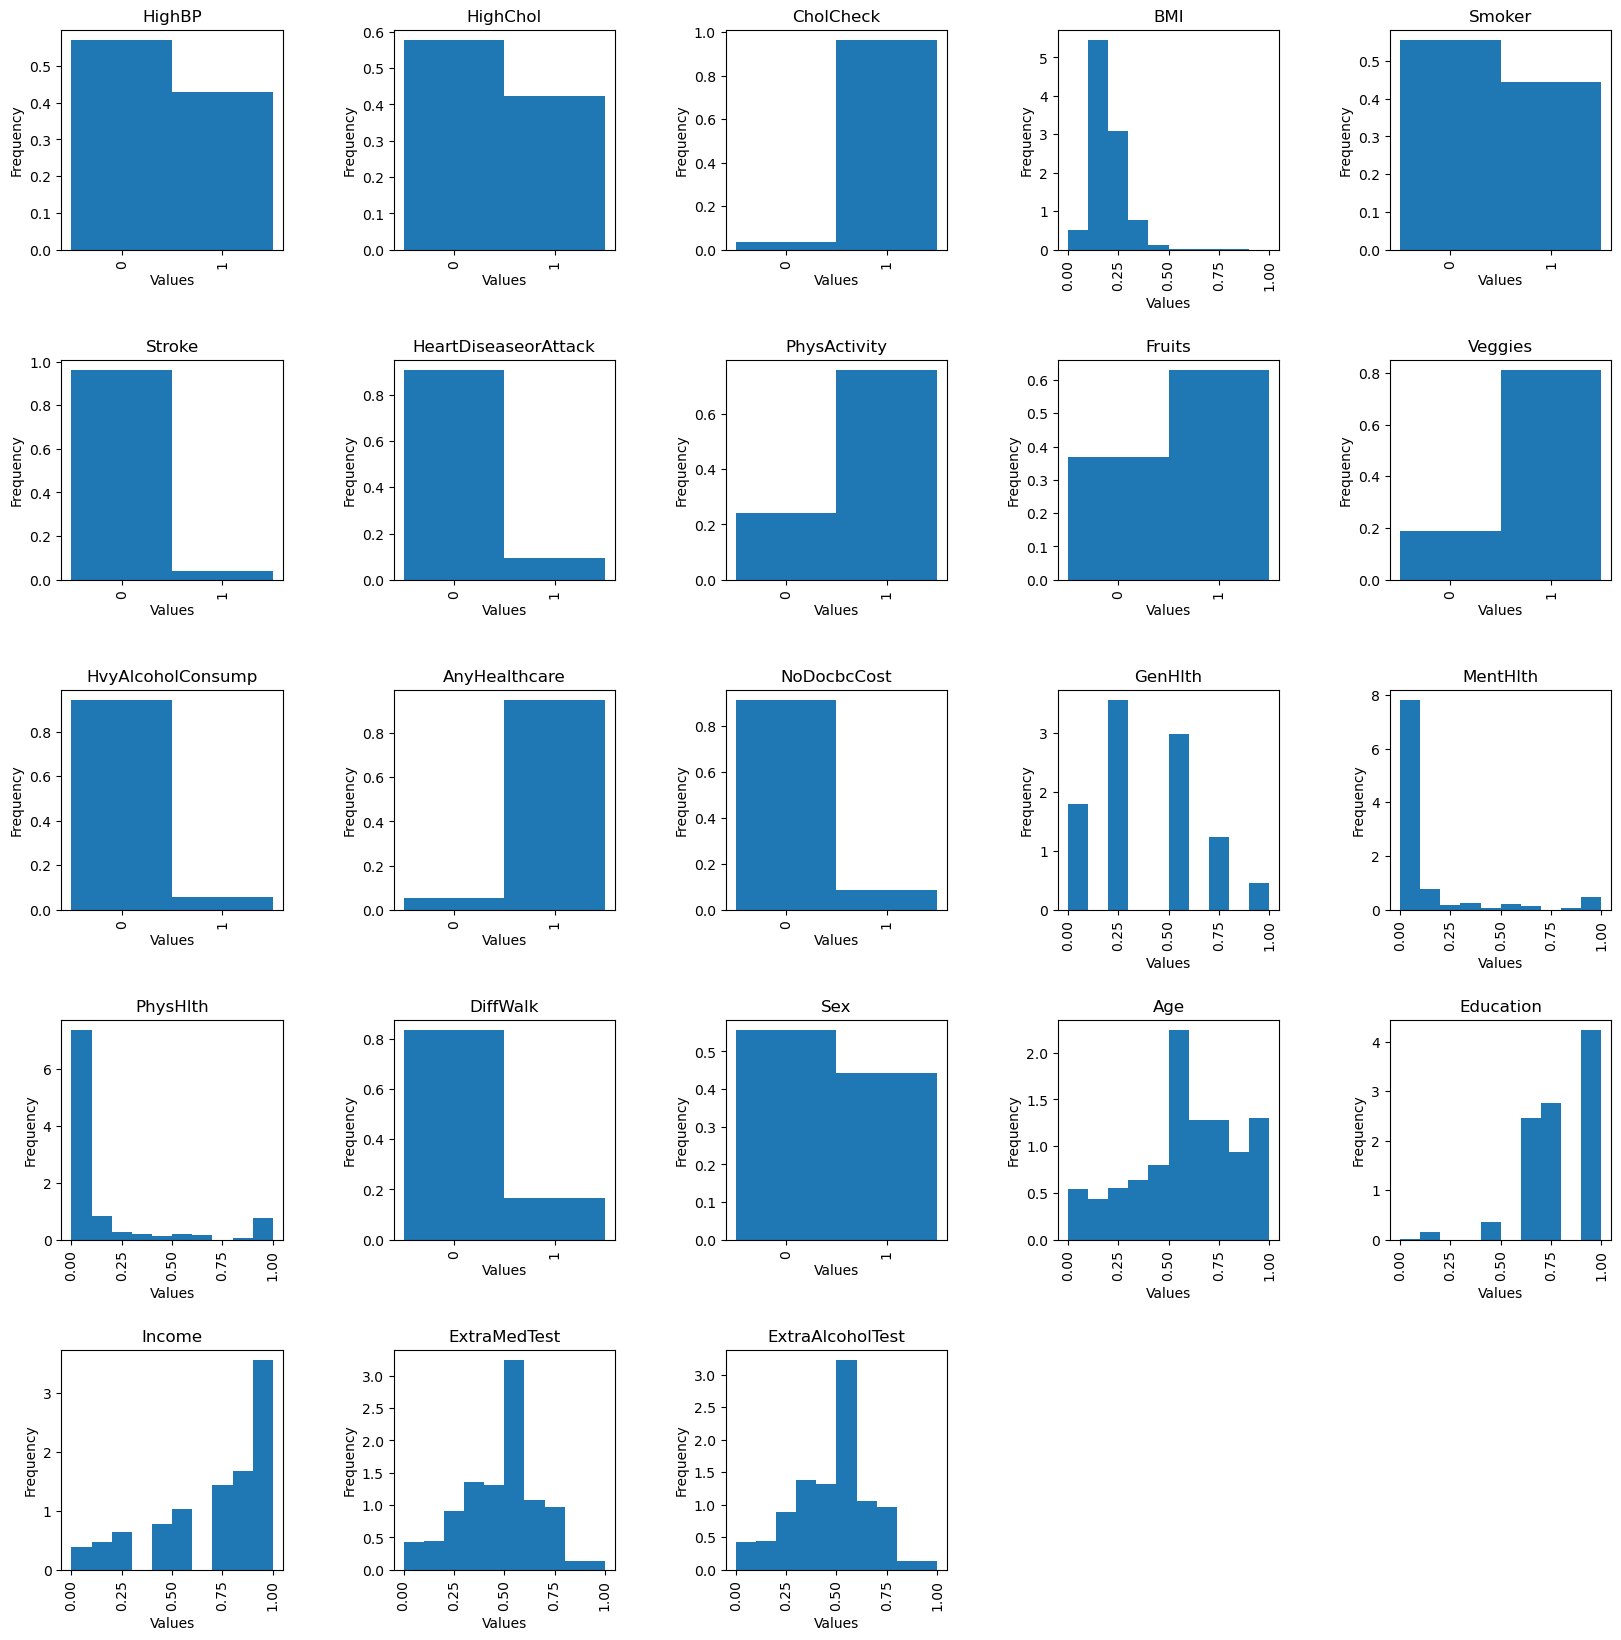

In [102]:
# list of columns that need scaling
numerical_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income", "ExtraMedTest", "ExtraAlcoholTest"]

# scaling using Min Max approach
scaler = MinMaxScaler()

# scaling the columns
health_data_test[numerical_cols] = scaler.fit_transform(health_data_test[numerical_cols])

# plot the histogram to preview the updated attributes
plot_histogram(health_data_test)

In [103]:
# all -> 0.9596442385868093
# feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# 0.9596688758037892
# feature_names = ['HighBP', 'HighChol', 'BMI', 'Smoker',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# not including ExtraMedTest and ExtraAlcoholTest -> BAD
# feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# remove low correlated column to Status -> 0.95966
# feature_names = ['HighBP', 'HighChol', 'BMI',
#        'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 
#        'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

# remove low correlated column to Status -> 0.95966
feature_names = ['HighBP', 'HighChol', 'BMI',
       'HeartDiseaseorAttack', 'GenHlth', 
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
       'ExtraMedTest', 'ExtraAlcoholTest']

# feature_names = ['ExtraMedTest', 'ExtraAlcoholTest']

test_X = health_data_test[feature_names].copy()

In [114]:
test_prediction = pd.Series(best_model.predict(test_X))

(array([44607.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6129.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

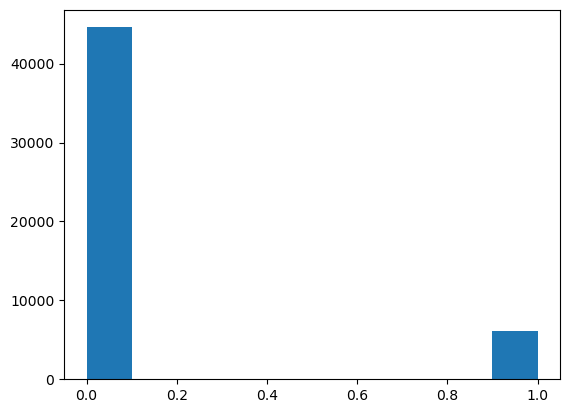

In [115]:
plt.hist(test_prediction)

In [118]:
test_prediction.describe()

count    50736.000000
mean         0.120802
std          0.325900
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

> **<span style="font-size:1.5em;">⚠</span> Warning: When normalizing, ensure that the same scaling parameters are applied to all splits (train/test/validation).**  
> A common mistake is to use one set of scaling parameters to do the normalization of train data and another on test data. This happens if you apply `fit_transform()` function twice: ones to train set and again for test data.  
> The correct approach would be to do the fit() on train data and then apply the transform() to train set and test set separately, to scale the data. 

> **<span style="font-size:1.5em;">⚠</span> SIÊU CẨN THẬN NHÉ, VÌ MÌNH DÙNG SCALING CHO MODEL NÊN CÁI TEST DATA CŨNG PHẢI SCALE TRC KHI MAKE PREDICTION!!!**

Note:
- Có thể bảo through out cái process này, t sẽ dùng random_state để đảm bảo các random sẽ giống nhau
- Xác định loại ML là supervised learning, cụ thể là binary classification với output là 0 hoặc 1
- Xem có features nào bị high corelation ko
- Feature scaling
- Feature Engineering: It's possible that the features you're using are not capturing all the relevant information. Try creating new features or transforming existing ones to better represent the underlying patterns in the data.
- Cross-Validation: Perform cross-validation to get a better estimate of the model's performance. This helps in assessing how well the model generalizes to unseen data.
- It's also worth noting that decision trees tend to perform well when the dataset has categorical variables with a large number of levels, as they can automatically handle such features without the need for one-hot encoding.
- Phải phân tích đề, chuẩn bị câu hỏi, để gặp thầy!
- Cẩn thận Underfit và Overfit
